# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid

# Loading the dataset

In [42]:
df = pd.read_excel('Crypto_report.xlsx')
de = pd.read_excel('Estimation.xlsx')

In [3]:
df

,String_len,Caesar_Cipher,Vigenere_cipher,One_time_pad,DES,AES,DH,RSA
0,5,0.00,0.00,0.00,0.20,0.00,0.00,0.00
1,10,0.00,0.00,0.00,0.07,0.00,0.00,1.02
2,15,0.00,0.50,0.00,0.07,0.00,0.00,0.00
3,20,0.00,0.00,0.00,0.09,0.00,0.00,0.00
4,25,0.00,0.00,0.00,0.10,0.00,0.00,1.02
...,...,...,...,...,...,...,...,...
495,2480,255.56,434.43,866.44,20.37,10.07,176.46,2428.31
496,2485,266.14,404.80,919.18,20.10,10.37,264.64,2445.54
497,2490,256.01,436.83,879.88,20.59,18.51,245.99,2405.67
498,2495,261.91,479.13,847.64,20.50,10.08,241.01,2497.95


# Exploratory Data Analysis and Data Cleaning

In [44]:
# Set "String_len" as the index
df = df.set_index('String_len')

In [5]:
# Check for missing values
print(df.isnull().sum())

Caesar_Cipher      0
Vigenere_cipher    0
One_time_pad       0
DES                0
AES                0
DH                 0
RSA                0
dtype: int64


In [6]:
# Check data types
print(df.dtypes)

Caesar_Cipher      float64
Vigenere_cipher    float64
One_time_pad       float64
DES                float64
AES                float64
DH                 float64
RSA                float64
dtype: object


In [7]:
# Drop duplicates
df = df.drop_duplicates()
df

,Caesar_Cipher,Vigenere_cipher,One_time_pad,DES,AES,DH,RSA
String_len,,,,,,,
5,0.00,0.00,0.00,0.20,0.00,0.00,0.00
10,0.00,0.00,0.00,0.07,0.00,0.00,1.02
15,0.00,0.50,0.00,0.07,0.00,0.00,0.00
20,0.00,0.00,0.00,0.09,0.00,0.00,0.00
25,0.00,0.00,0.00,0.10,0.00,0.00,1.02
...,...,...,...,...,...,...,...
2480,255.56,434.43,866.44,20.37,10.07,176.46,2428.31
2485,266.14,404.80,919.18,20.10,10.37,264.64,2445.54
2490,256.01,436.83,879.88,20.59,18.51,245.99,2405.67


In [8]:
# Head of the DataSet
df.head()

,Caesar_Cipher,Vigenere_cipher,One_time_pad,DES,AES,DH,RSA
String_len,,,,,,,
5,0.0,0.0,0.0,0.20,0.0,0.0,0.00
10,0.0,0.0,0.0,0.07,0.0,0.0,1.02
15,0.0,0.5,0.0,0.07,0.0,0.0,0.00
20,0.0,0.0,0.0,0.09,0.0,0.0,0.00
25,0.0,0.0,0.0,0.10,0.0,0.0,1.02


In [9]:
# Tail of the DataSet
df.tail()

,Caesar_Cipher,Vigenere_cipher,One_time_pad,DES,AES,DH,RSA
String_len,,,,,,,
2480,255.56,434.43,866.44,20.37,10.07,176.46,2428.31
2485,266.14,404.80,919.18,20.10,10.37,264.64,2445.54
2490,256.01,436.83,879.88,20.59,18.51,245.99,2405.67
2495,261.91,479.13,847.64,20.50,10.08,241.01,2497.95
2500,276.64,456.40,1016.17,21.24,15.71,232.61,2497.62


In [10]:
#dimention of the data set
df.shape

(500, 7)

In [11]:
# Columns in DataSet
df.columns

Index(['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES', 'DH',
       'RSA'],
      dtype='object')

In [12]:
# Info on DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5 to 2500
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Caesar_Cipher    500 non-null    float64
 1   Vigenere_cipher  500 non-null    float64
 2   One_time_pad     500 non-null    float64
 3   DES              500 non-null    float64
 4   AES              500 non-null    float64
 5   DH               500 non-null    float64
 6   RSA              500 non-null    float64
dtypes: float64(7)
memory usage: 31.2 KB


In [13]:
# Describe the DataSet
df.describe()

,Caesar_Cipher,Vigenere_cipher,One_time_pad,DES,AES,DH,RSA
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,74.50542,131.325660,291.883020,7.803780,5.418760,36.442560,845.563120
std,82.06093,135.378713,285.942228,6.437499,6.562234,41.590821,801.895164
min,0.00000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,10.23750,19.765000,40.115000,2.680000,0.000000,0.000000,123.035000
50%,46.87000,69.390000,206.370000,6.120000,0.000000,22.425000,623.800000
75%,103.46500,245.830000,514.685000,10.582500,10.442500,54.600000,1411.285000
max,315.49000,479.130000,1016.170000,24.690000,24.350000,264.640000,4281.290000


In [14]:
# max of all the algorithms
print('Max of Caesar Cipher:   ',max(df.Caesar_Cipher))
print('Max of Vigenere Cipher: ',max(df.Vigenere_cipher))
print('Max of OTP:             ',max(df.One_time_pad))
print('Max of DES:             ',max(df.DES))
print('Max of AES:             ',max(df.AES))
print('Max of DH:              ',max(df.DH))
print('Max of RSA:             ',max(df.RSA))

Max of Caesar Cipher:    315.49
Max of Vigenere Cipher:  479.13
Max of OTP:              1016.17
Max of DES:              24.69
Max of AES:              24.35
Max of DH:               264.64
Max of RSA:              4281.29











# Data Analysis and Data Visualization

In [15]:
# Simple Anova Test
fvalue, pvalue = stats.f_oneway(df['Caesar_Cipher'], df['Vigenere_cipher'], df['One_time_pad'], df['DES'], df['AES'], df['DH'], df['RSA'])

if pvalue < 0.05:
    print('There is a significant difference in performance between at least two algorithms.')
else:
    print('There is no significant difference in performance between any of the algorithms.')

There is a significant difference in performance between at least two algorithms.


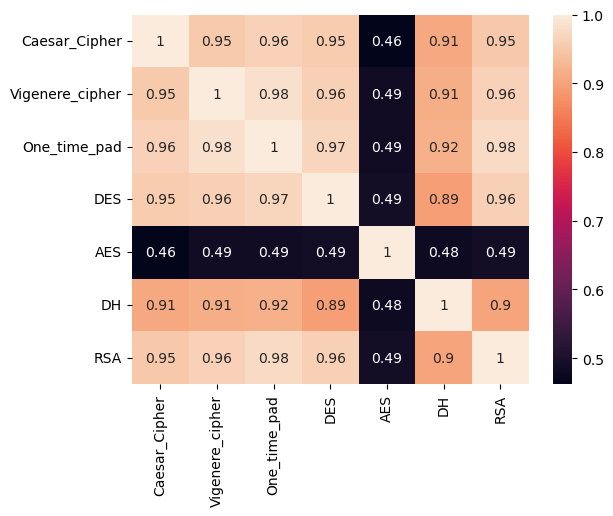

In [16]:
# Correlation between Variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
# Compute correlations
print(df.corr())

                 Caesar_Cipher  Vigenere_cipher  One_time_pad       DES  \
Caesar_Cipher         1.000000         0.953426      0.963032  0.954410   
Vigenere_cipher       0.953426         1.000000      0.984388  0.961188   
One_time_pad          0.963032         0.984388      1.000000  0.969652   
DES                   0.954410         0.961188      0.969652  1.000000   
AES                   0.462045         0.487053      0.487127  0.487296   
DH                    0.909314         0.914671      0.918308  0.894861   
RSA                   0.950354         0.963425      0.976434  0.960501   

                      AES        DH       RSA  
Caesar_Cipher    0.462045  0.909314  0.950354  
Vigenere_cipher  0.487053  0.914671  0.963425  
One_time_pad     0.487127  0.918308  0.976434  
DES              0.487296  0.894861  0.960501  
AES              1.000000  0.479211  0.488228  
DH               0.479211  1.000000  0.901461  
RSA              0.488228  0.901461  1.000000  


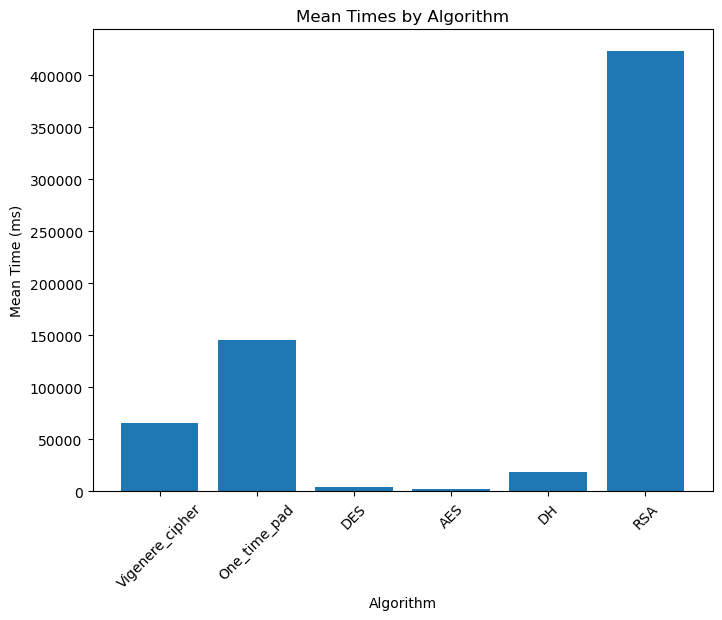

In [18]:
# Plot a bar chart of cipher types
cipher_counts = df.iloc[:, 1:].sum()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(cipher_counts.index, cipher_counts.values)
plt.title('Mean Times by Algorithm')
ax.set_xlabel('Cipher Type')
ax.set_ylabel('Count')
plt.xlabel('Algorithm')
plt.ylabel('Mean Time (ms)')
ax.tick_params(axis='x', rotation=45)

plt.show()

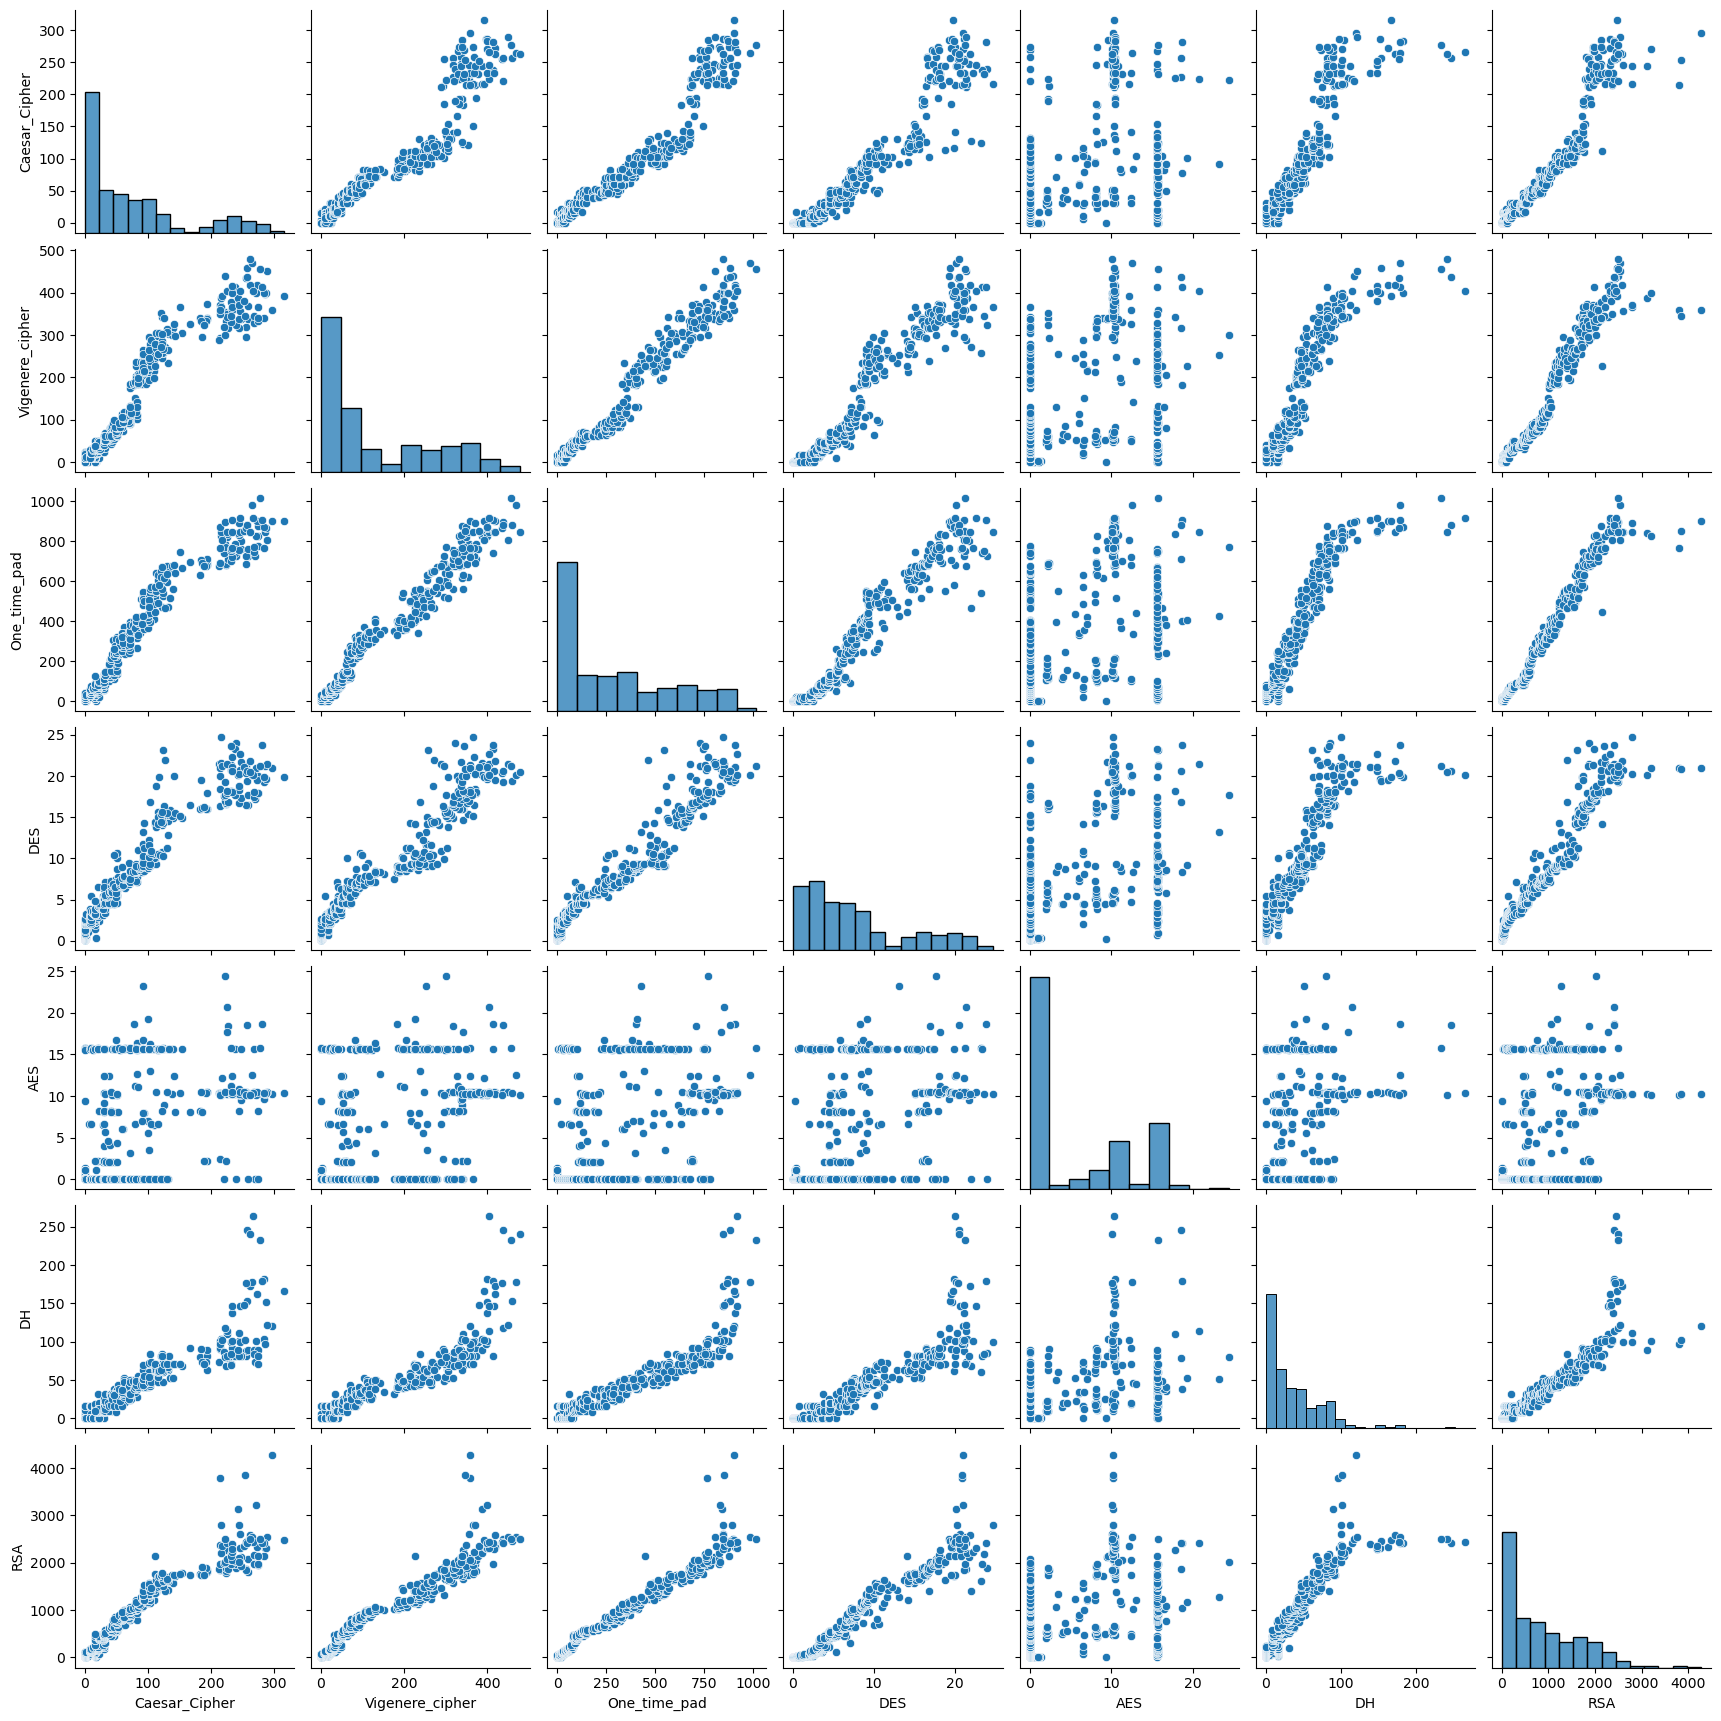

In [19]:
# Create a pair plot using seaborn
sns.pairplot(df)
plt.show()

# Variation of Time Complexity with respect to String Length

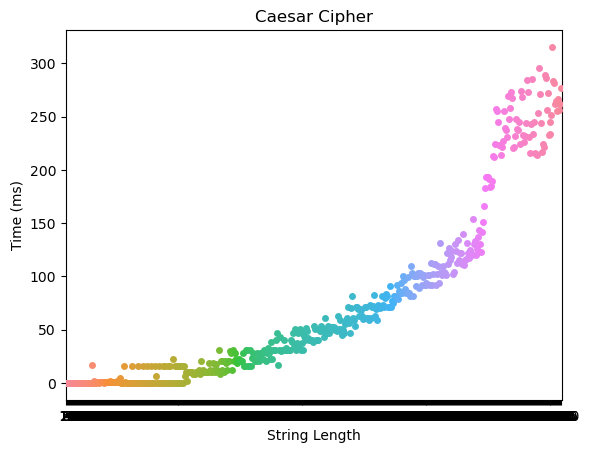

In [20]:
# Create a swarm plot of "Caesar_Cipher" against the index

sns.swarmplot(y='Caesar_Cipher', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('Caesar Cipher')
plt.show()

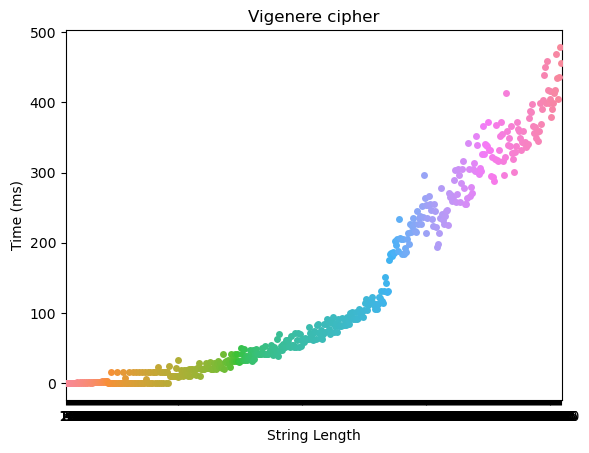

In [21]:
# Create a swarm plot of "Vigenere_Cipher" against the index

sns.swarmplot(y='Vigenere_cipher', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('Vigenere cipher')
plt.show()

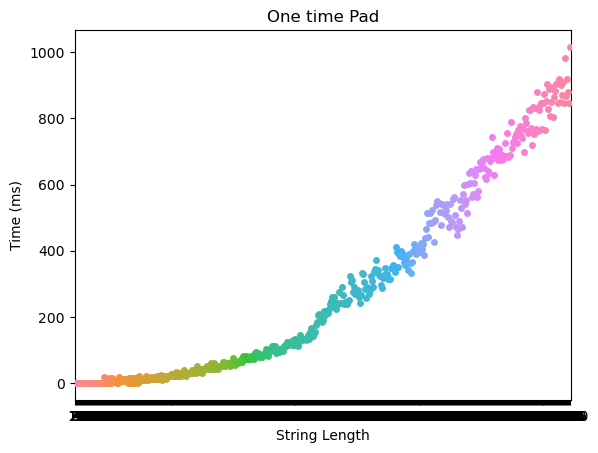

In [22]:
# Create a swarm plot of "One_time_pad" against the index

sns.swarmplot(y='One_time_pad', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('One time Pad')
plt.show()

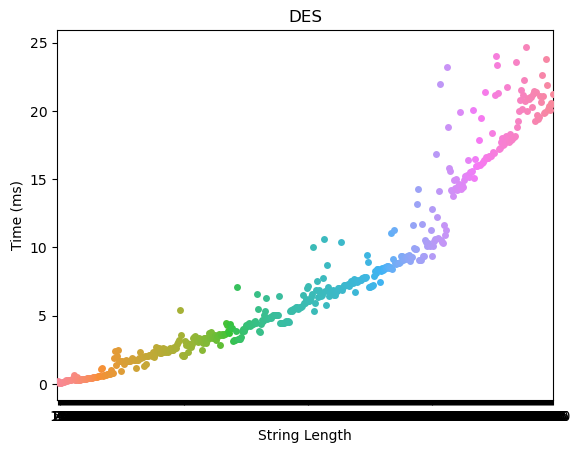

In [23]:
# Create a swarm plot of "DES" against the index

sns.swarmplot(y='DES', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('DES')
plt.show()

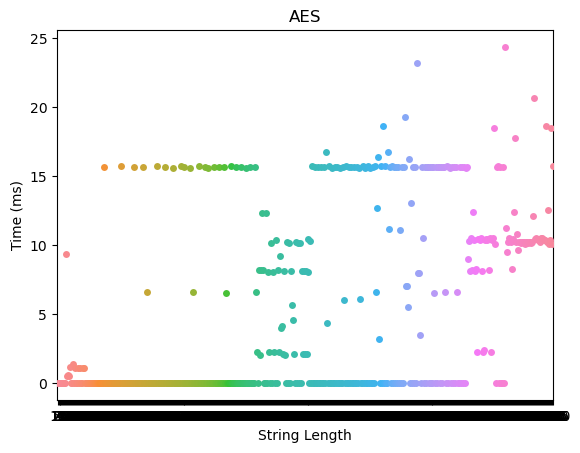

In [24]:
# Create a swarm plot of "AES" against the index

sns.swarmplot(y='AES', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('AES')
plt.show()

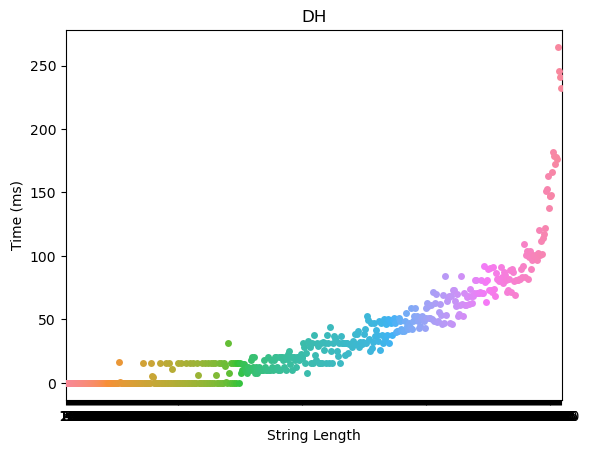

In [25]:
# Create a swarm plot of "DH" against the index

sns.swarmplot(y='DH', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('DH')
plt.show()

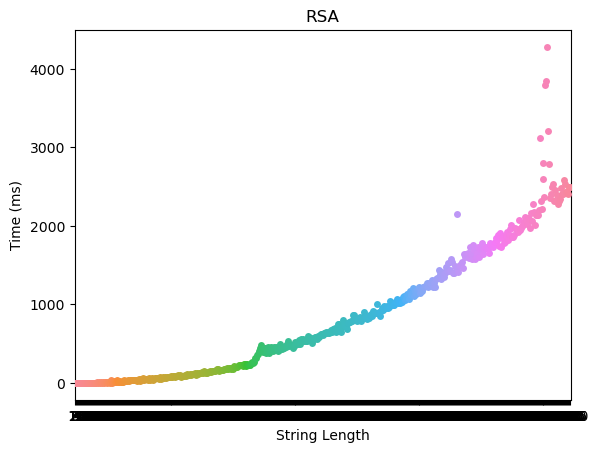

In [26]:
# Create a swarm plot of "RSA" against the index

sns.swarmplot(y='RSA', x=df.index, data=df)
plt.ylabel('Time (ms)')
plt.xlabel('String Length')
plt.title('RSA')
plt.show()

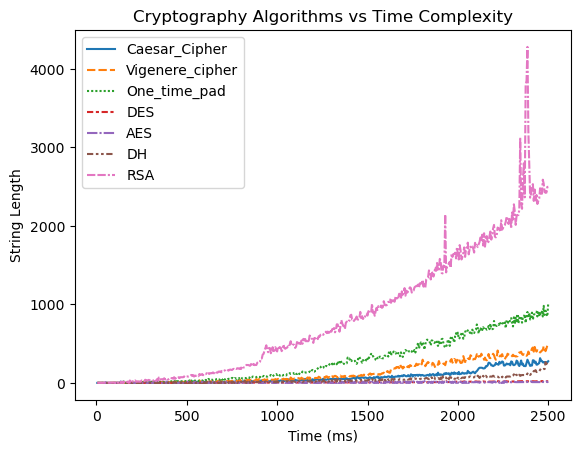

In [27]:
# Create the line plot
sns.lineplot(data=df)
plt.xlabel('Time (ms)')
plt.ylabel('String Length')
plt.title('Cryptography Algorithms vs Time Complexity')

plt.show()

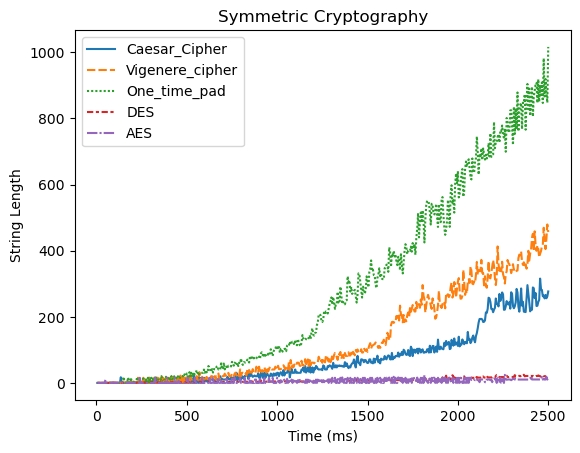

In [28]:
# Symmetric Cryptography

cols = ['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES']
ds1 = df[cols]

# Create the line plot
sns.lineplot(data=ds1)
plt.xlabel('Time (ms)')
plt.ylabel('String Length')
plt.title('Symmetric Cryptography')

plt.show()

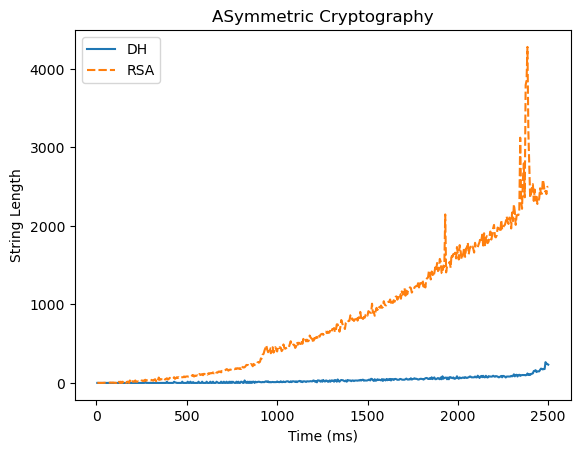

In [29]:
# Asymmetric Cryptography

cols = ['DH', 'RSA']
ds2 = df[cols]

# Create the line plot
sns.lineplot(data=ds2)
plt.xlabel('Time (ms)')
plt.ylabel('String Length')
plt.title('ASymmetric Cryptography')

plt.show()

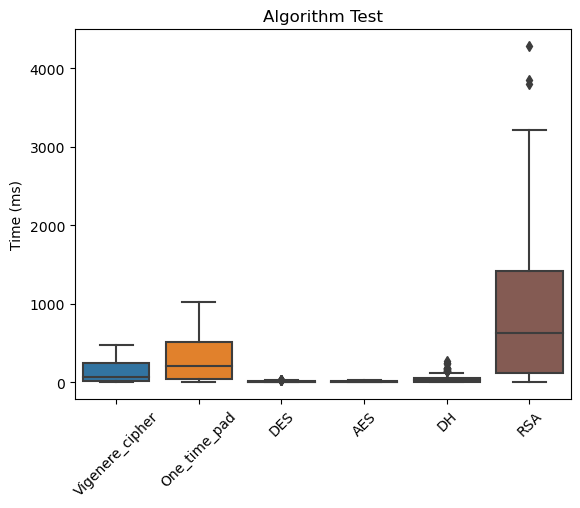

In [30]:
# Algorithm test

sns.boxplot(data=df.iloc[:, 1:])
plt.title('Algorithm Test')
plt.xticks(rotation=45)
plt.ylabel('Time (ms)')
plt.show()

In [31]:
de = de.set_index('Algorithm')
de

,Time Complexity,Key Size,Estimated Time to Crack (Years)
Algorithm,,,
Caesar Cipher,O(n),25,1
Vigenere Cipher,O(n),100,1
One-Time Pad,O(n),10,1
DES,O(n^2),128,8.8 x 10^10
AES,O(n^2),256,1.2 x 10^16
Diffie-Hellman,O(n^3),2048,5.8 x 10^35
RSA,O(n^3),2048,2.1 x 10^42


In [32]:
# Data Types of Data Frames
print(de.dtypes)

Time Complexity                    object
Key Size                            int64
Estimated Time to Crack (Years)    object
dtype: object


In [33]:
# Shape of DataSet
de.shape

(7, 3)

In [34]:
# Describe DataSet
print(de.describe())

          Key Size
count     7.000000
mean    659.285714
std     952.072251
min      10.000000
25%      62.500000
50%     128.000000
75%    1152.000000
max    2048.000000


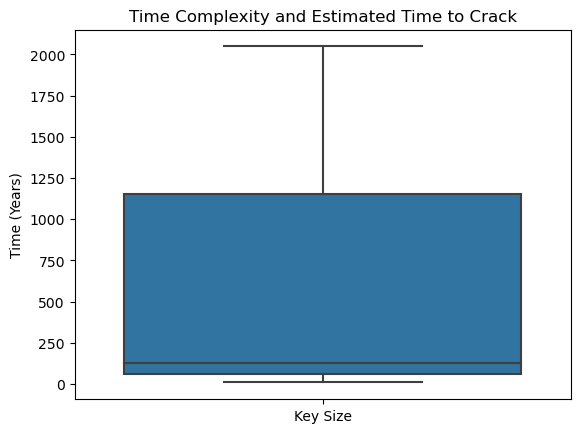

In [35]:
# Box Plot

sns.boxplot(data=de)
plt.title('Time Complexity and Estimated Time to Crack')
plt.ylabel('Time (Years)')
plt.show()

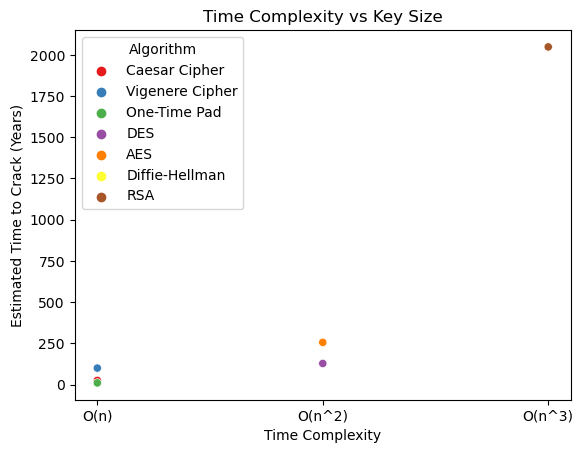

In [36]:
# Scatter plot of time complexity vs estimated time to crack with different colors for each algorithm

sns.scatterplot(x='Time Complexity', y='Key Size', hue='Algorithm', data=de, palette='Set1')
plt.xlabel('Time Complexity')
plt.ylabel('Estimated Time to Crack (Years)')
plt.title('Time Complexity vs Key Size')
plt.show()

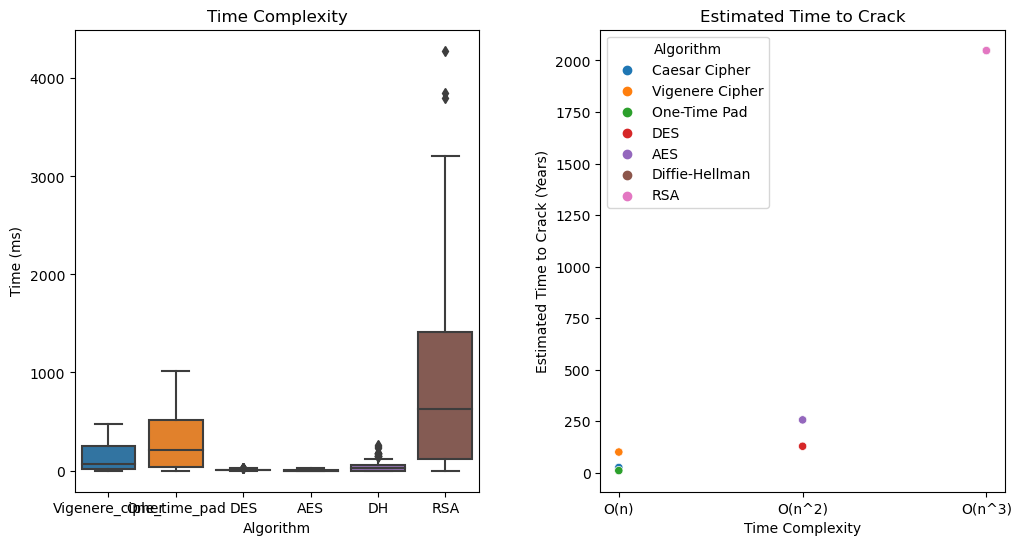

In [37]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot time complexity in the first subplot
sns.boxplot(data=df.iloc[:, 1:], ax=ax1)
ax1.set_title('Time Complexity')
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Algorithm')

# Plot estimated time to crack in the second subplot
sns.scatterplot(data=de, x='Time Complexity', y='Key Size', hue='Algorithm', ax=ax2)
ax2.set_title('Estimated Time to Crack')
ax2.set_ylabel('Estimated Time to Crack (Years)')
ax2.set_xlabel('Time Complexity')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

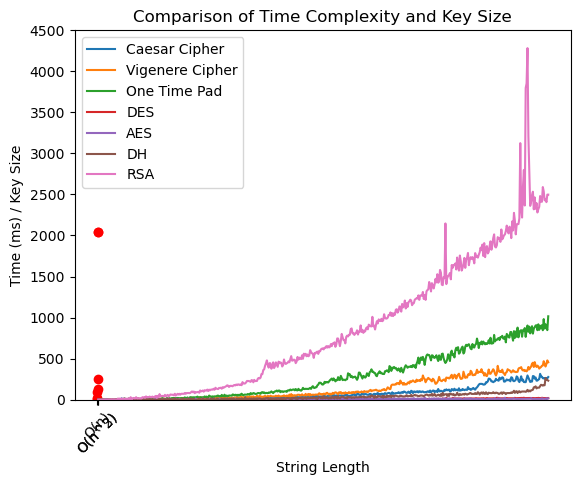

In [38]:
# Plot the Time Complexity data
plt.plot(df.index, df['Caesar_Cipher'], label='Caesar Cipher')
plt.plot(df.index, df['Vigenere_cipher'], label='Vigenere Cipher')
plt.plot(df.index, df['One_time_pad'], label='One Time Pad')
plt.plot(df.index, df['DES'], label='DES')
plt.plot(df.index, df['AES'], label='AES')
plt.plot(df.index, df['DH'], label='DH')
plt.plot(df.index, df['RSA'], label='RSA')
plt.xticks(rotation=45)


# Plot the Estimated Time to Crack data
plt.scatter(de['Time Complexity'], de['Key Size'], color='red')

# Set plot title, x-label, and y-label
plt.title('Comparison of Time Complexity and Key Size')
plt.xlabel('String Length')
plt.ylabel('Time (ms) / Key Size')

# Adjust y-axis
plt.ylim(bottom=0, top=4500)

# Set distance between the parameters in the y-axis
plt.subplots_adjust(wspace=0.5)

# Add legend to plot
plt.legend()

# Show plot
plt.show()

In [39]:
de

,Time Complexity,Key Size,Estimated Time to Crack (Years)
Algorithm,,,
Caesar Cipher,O(n),25,1
Vigenere Cipher,O(n),100,1
One-Time Pad,O(n),10,1
DES,O(n^2),128,8.8 x 10^10
AES,O(n^2),256,1.2 x 10^16
Diffie-Hellman,O(n^3),2048,5.8 x 10^35
RSA,O(n^3),2048,2.1 x 10^42


In [40]:
df

,Caesar_Cipher,Vigenere_cipher,One_time_pad,DES,AES,DH,RSA
String_len,,,,,,,
5,0.00,0.00,0.00,0.20,0.00,0.00,0.00
10,0.00,0.00,0.00,0.07,0.00,0.00,1.02
15,0.00,0.50,0.00,0.07,0.00,0.00,0.00
20,0.00,0.00,0.00,0.09,0.00,0.00,0.00
25,0.00,0.00,0.00,0.10,0.00,0.00,1.02
...,...,...,...,...,...,...,...
2480,255.56,434.43,866.44,20.37,10.07,176.46,2428.31
2485,266.14,404.80,919.18,20.10,10.37,264.64,2445.54
2490,256.01,436.83,879.88,20.59,18.51,245.99,2405.67


# OLS Regression Test

In [43]:
# create a response variable
y = df['String_len']

# create a matrix of predictors
X = df[['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES', 'DH', 'RSA']]

# add a constant term to the matrix of predictors
X = sm.add_constant(X)

# fit the OLS model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

# Only for this step 
# Remove String_len as index

                            OLS Regression Results                            
Dep. Variable:             String_len   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     867.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          3.55e-272
Time:                        22:34:31   Log-Likelihood:                -3352.5
No. Observations:                 500   AIC:                             6721.
Df Residuals:                     492   BIC:                             6755.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             450.1432     16.454     

# Accuracy Test

In [45]:
# create a binary response variable (use 0.5 as an example threshold value)
y = df.iloc[:, 0].apply(lambda x: 1 if x > 0.5 else 0)

# create a matrix of predictors (i.e., encryption techniques)
X = df[['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES', 'DH', 'RSA']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a logistic regression model to the training data
model = LogisticRegression(random_state=42).fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# compute the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


In [46]:
# create a binary response variable (use 0.5 as an example threshold value)
y = df.iloc[:, 0].apply(lambda x: 1 if x > 0.5 else 0)

# create a matrix of predictors (i.e., encryption techniques)
X = df[['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES', 'DH', 'RSA']]

# fit a logistic regression model with cross-validation
model = LogisticRegression(random_state=42)
scores = cross_val_score(model, X, y, cv=5)

# print the mean and standard deviation of the scores
print(f"Mean accuracy: {mean(scores)*100:.2f}%")
print(f"Standard deviation: {std(scores):.2f}")

Mean accuracy: 87.00%
Standard deviation: 0.26


# SVC Accuracy

In [47]:
# create a binary response variable (use 0.5 as an example threshold value)
y = df.iloc[:, 0].apply(lambda x: 1 if x > 0.5 else 0)

# create a matrix of predictors (i.e., encryption techniques)
X = df[['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES', 'DH', 'RSA']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit an SVC model to the training data
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# make predictions on the testing data using the SVC model
svc_pred = svc_model.predict(X_test)

# compute the accuracy of the SVC model
svc_acc = accuracy_score(y_test, svc_pred)
print(f"SVC accuracy: {svc_acc*100:.2f}%")

SVC accuracy: 77.00%


# MSS Accuracy

In [48]:
# create a binary response variable (use 0.5 as an example threshold value)
y = df.iloc[:, 0].apply(lambda x: 1 if x > 0.5 else 0)

# create a matrix of predictors (i.e., encryption techniques)
X = df[['Caesar_Cipher', 'Vigenere_cipher', 'One_time_pad', 'DES', 'AES', 'DH', 'RSA']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit an MSS model to the training data
mss_model = NearestCentroid()
mss_model.fit(X_train, y_train)

# make predictions on the testing data using the MSS model
mss_pred = mss_model.predict(X_test)

# compute the accuracy of the MSS model
mss_acc = accuracy_score(y_test, mss_pred)
print(f"MSS accuracy: {mss_acc*100:.2f}%")

MSS accuracy: 78.00%


# AES vs RSA

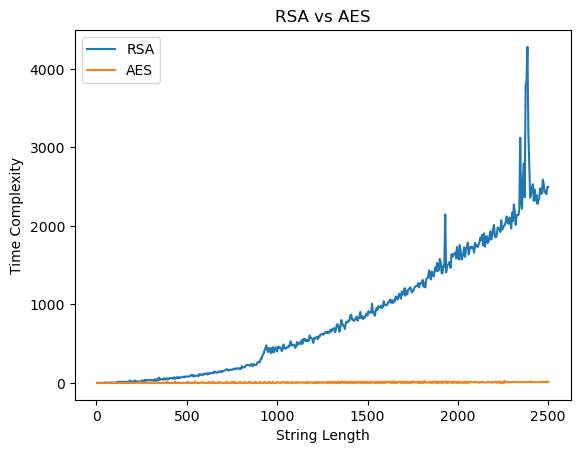

In [49]:
# Select RSA and AES data from the DataFrame
rsa_data = df.loc[:, 'RSA']
aes_data = df.loc[:, 'AES']

# Plot line graph
plt.plot(rsa_data, label='RSA')
plt.plot(aes_data, label='AES')
plt.xlabel('String Length')
plt.ylabel('Time Complexity')
plt.title('RSA vs AES')
plt.legend()
plt.show()

# Cracking AES vs Cracking RSA

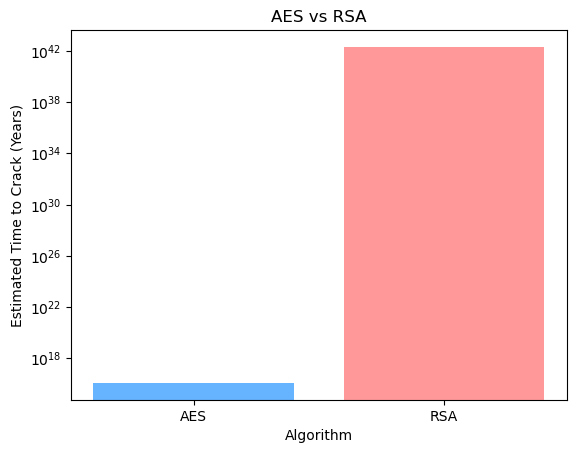

In [50]:

# Define the values for AES and RSA
aes_years = 1.2e16
rsa_years = 2.1e42

# Set the colors for AES and RSA
aes_color = '#66b3ff'
rsa_color = '#ff9999'

# Create a bar chart with the values for AES and RSA
plt.bar(['AES', 'RSA'], [aes_years, rsa_years], color=[aes_color, rsa_color])

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Label the x and y axes and set the title
plt.xlabel('Algorithm')
plt.ylabel('Estimated Time to Crack (Years)')
plt.title('AES vs RSA')

# Show the plot
plt.show()